Arthur Pires - RA: 265790 \\

# Pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
import warnings # Serve para ignorar mensagens de alerta que aparecem 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [4]:
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 20,
    'lines.linewidth' : 1.5,
    'lines.markersize' : 10,
    'figure.figsize': (8,5),
    'xtick.labelsize': 12, 
    'ytick.labelsize': 12,
    'font.family': 'serif',
    'legend.fontsize':12,
    'axes.labelsize':18
})

# Importing Kuramoto dataset

We first import the solution obtained from the Kuramoto differential equation subject to periodic boundary conditions. The spatial domain has length L=200 and discretized with 256 nodes. The time step was 0.25 s with a time domain from t=0 to t=2000 s.

\begin{equation}
u_t + u_x u + u_{xx} + u_{xxxx}=0 \tag{3}
\end{equation}

\begin{equation}
u(t=0,x) = cos \frac{\pi x}{20}*(1+sin\frac{\pi x}{20})
\end{equation}

The first 100 seconds were truncated in order to view the more chaotic part of the solution

In [5]:
X = np.load('Kuramoto_X.npy')
T = np.load('Kuramoto_T.npy')
U = np.load('Kuramoto_U.npy')

In [6]:
X.shape

(40001, 256)

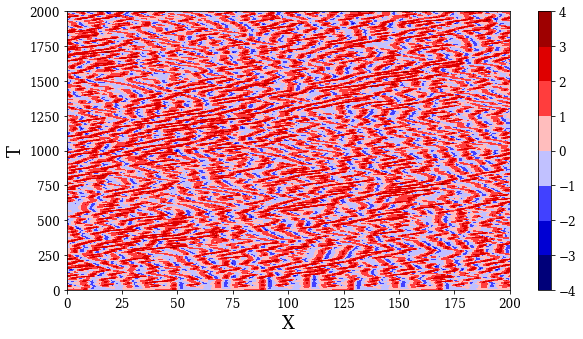

In [7]:
fig, ax = plt.subplots(figsize=(9, 5))

surf = ax.contourf(X, T, U, cmap=plt.get_cmap("seismic"))

fig.colorbar(surf)
plt.xlabel('X')
plt.ylabel('T')
plt.tight_layout()

In [8]:
# Taking out the first 100 seconds of data

X = X[2000:]
T = T[2000:]
U = U[2000:]

## Creating the training and test set

In [9]:
# 75% training and 25% testing

X_train = X[:30000]
T_train = T[:30000]
U_train = U[:30000]

X_test = X[30000:]
T_test = T[30000:]
U_test = U[30000:]

In [10]:
print(U_train.shape)
print(U_test.shape)

(30000, 256)
(8001, 256)


In [11]:
# Normalizing the dataset to be with 0 mean and unit variance

scaler = StandardScaler()
U_scaled_train = scaler.fit_transform(U_train)
U_scaled_test = scaler.transform(U_test)

# PINN

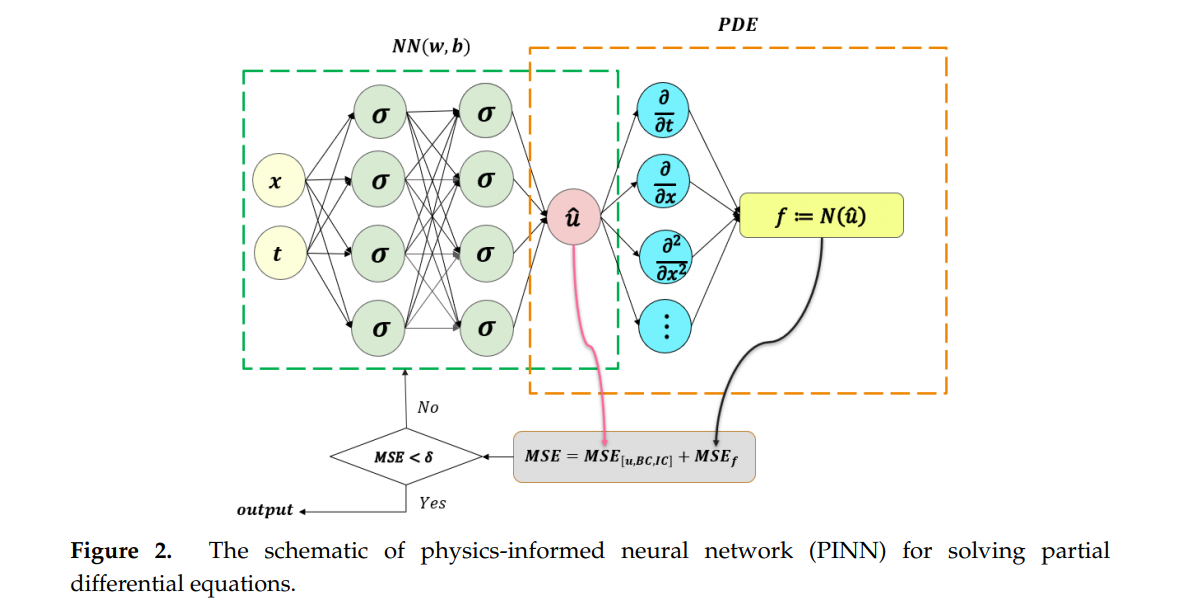

Rewritting the Kuramoto equation:

\begin{equation}
u_t + u_x u + u_{xx} + u_{xxxx}=0 \tag{3}
\end{equation}

The neural network will try to find a mapping between the independent variables (**x** and **t** in figure 2) and the approximate solution of the differential equation **u**. This approximation will undergoe automatic differentiation to obtain the expression **f** that is equal to the differential equation we would like to solve. In this case:

\begin{equation}
f := u_t + u_x u + u_{xx} + u_{xxxx}
\end{equation}

There will be a neural network MSE (left side) and a differential equation MSE (right side)

The shared parameters between the neural network u(t,x) and residual equation f(t,x) can be learned by minimizing the mean squared error loss below:

\begin{equation}
MSE = MSE_u + MSE_f
\end{equation}

Where

- $MSE_u:$ = Error associated with the training data on **u(t,x)** 
- $MSE_u:$ = Error associated by imforcing the structure of equation **f** at a finite set of collocation points, whose number and location is taken from the same training data.

By definition of **f**, $MSE_u$ should be zero, which indicates there is no residual.

# Sampling from the domain

From PCA, the size of our dataset was reduced from 256 time series to 93 time series. Therefore, our datset is 38000 x 256 

We now must sample from the initial condition and boundary condition. For this case, uniform sampling was applied to obtain 50 initial value points and 10000 boundary points

In [12]:
# Set random seed for reproducible results
tf.random.set_seed(0)

# Set number of data points

N_t = 10000 # 
N_x = 50

# Draw uniform sample points for initial condition
t_init = tf.ones((N_x,1), dtype=float)*T[0,0]
x_init = tf.random.uniform((N_x,1), X[0,:].min(), X[0,:].max(), dtype=float)
u_init = pd.DataFrame(U_pca)

#X_init = tf.concat([t_0, x_0], axis=1) # data points for initial condition

# Draw uniform samples from left and right boundaries

NameError: name 'tf' is not defined

In [ ]:
u_init

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

#plt.scatter(X, T, U, cmap=plt.get_cmap("seismic"))

#surf = ax.contourf(X, T, U, cmap=plt.get_cmap("seismic"))
plt.scatter(x_init,t_init,c=u_init,marker='X')

fig.colorbar(surf)
plt.xlabel('X')
plt.ylabel('T')
plt.tight_layout()

In [ ]:
dfgdfg

## Constitutive model step

In [ ]:
# Define the residual of the equation
def residual(t,x,u,u_t,u_x,u_xx,u_xxxx):
    return u_t + u_x u + u_x*x + u_xxxx

In [ ]:
U_train_pca.shape

In [ ]:
model.fit(X_train,
             U_train_pca,
             epochs=30,
             validation_data=(U_test_pca,U_test_pca),
             batch_size = 8,
             verbose=0)
    
# Objective function to be minimized by Optuna
MSE_score_test_set = model.evaluate(U_train_pca,U_train_pca,verbose=0)
MSE_score_train_set = model.evaluate(U_test_pca,U_test_pca,verbose=0)
    
score = MSE_score_test_set